In [1]:
# 1

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

plt.rcParams['figure.dpi'] = 100
plt.rcParams['figure.figsize'] = (8,5.5)

In [3]:
usa = pd.read_csv("veri_kumeleri/states_all.csv")
usa.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
usa["winsorize_TOTAL_REVENUE"] = winsorize(usa["TOTAL_REVENUE"], (0, 0.10))
usa["winsorize_TOTAL_EXPENDITURE"] = winsorize(usa["TOTAL_EXPENDITURE"], (0, 0.10))

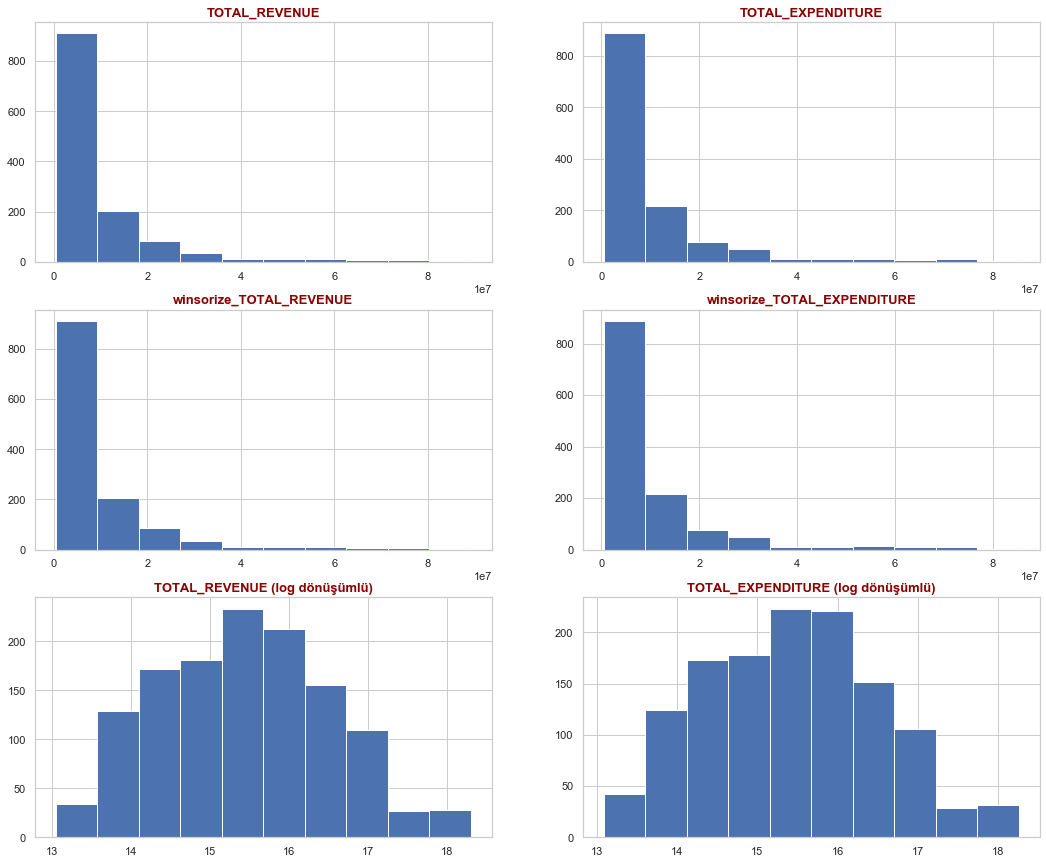

In [5]:
plt.figure(figsize=(18,15))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']
winsorize_degiskenler = ['winsorize_TOTAL_REVENUE', 'winsorize_TOTAL_EXPENDITURE']

for i in range(2):
    plt.subplot(3, 2, i+1)
    plt.hist(usa[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)
    
for i in range(2):
    plt.subplot(3, 2, i+3)
    plt.hist(usa[winsorize_degiskenler[i]])
    plt.title(winsorize_degiskenler[i], fontdict=baslik_font)
    
for i in range(2):
    plt.subplot(3, 2, i+5)
    plt.hist(np.log(usa[degiskenler[i]]))
    plt.title(degiskenler[i] + ' (log dönüşümlü)', fontdict=baslik_font)

In [6]:
# 2

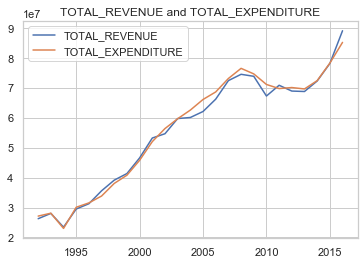

In [7]:
plt.plot(usa["YEAR"].unique(), usa.loc[usa["STATE"]=="CALIFORNIA"]["TOTAL_REVENUE"])
plt.plot(usa["YEAR"].unique(), usa.loc[usa["STATE"]=="CALIFORNIA"]["TOTAL_EXPENDITURE"])
plt.title("TOTAL_REVENUE and TOTAL_EXPENDITURE")
plt.legend(["TOTAL_REVENUE", "TOTAL_EXPENDITURE"])
plt.show()


In [8]:
# 3

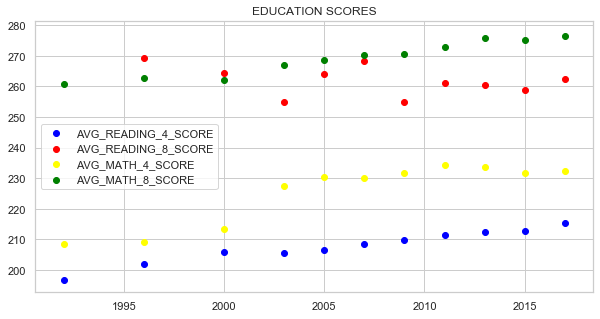

In [9]:
usa2=usa.loc[usa["STATE"]=="CALIFORNIA"]
plt.figure(figsize=(10,5))

plt.scatter(usa["YEAR"].unique(), usa2["AVG_READING_4_SCORE"],color='blue')
plt.scatter(usa["YEAR"].unique(), usa2["AVG_READING_8_SCORE"],color='red')
plt.scatter(usa["YEAR"].unique(), usa2["AVG_MATH_4_SCORE"],color='yellow')
plt.scatter(usa["YEAR"].unique(), usa2["AVG_MATH_8_SCORE"],color='green')
plt.title("EDUCATION SCORES")
plt.legend(["AVG_READING_4_SCORE", "AVG_READING_8_SCORE","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE"])
plt.show()


In [10]:
#4 ve 5

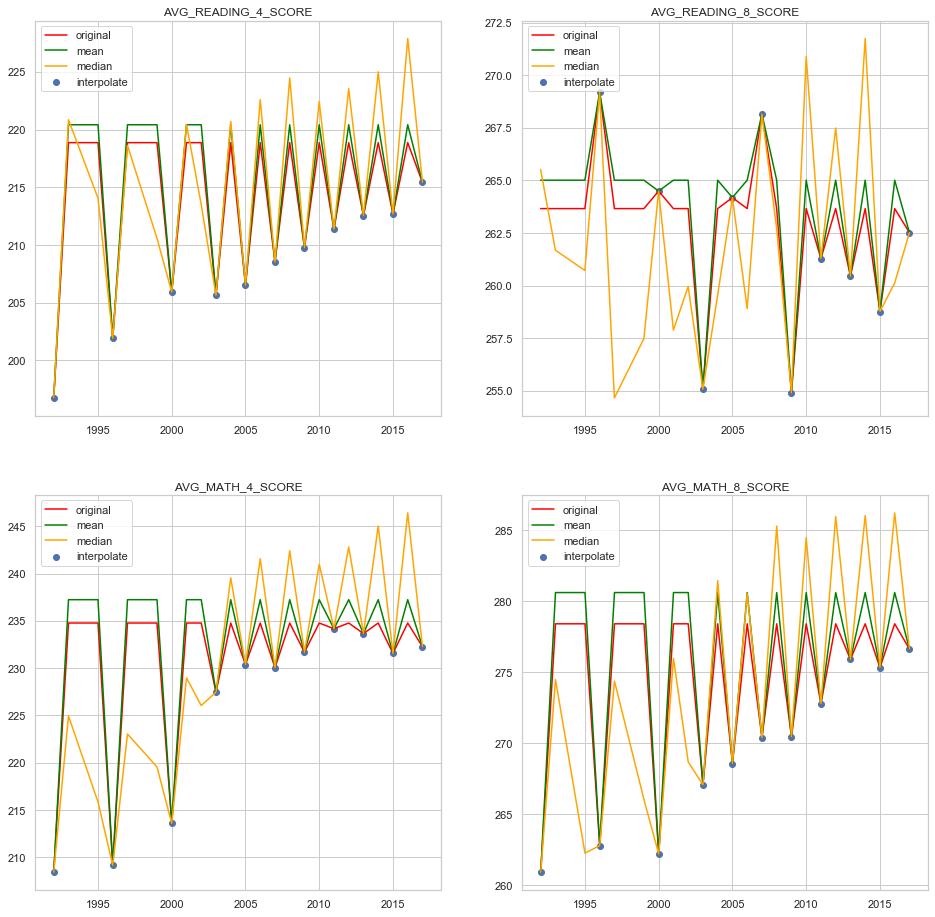

In [11]:
plt.figure(figsize=(16,16))
#AVG_READING_4_SCORE
usa2["AVG_READING_4_SCORE_MEAN"] = usa2["AVG_READING_4_SCORE"]
usa2["AVG_READING_4_SCORE_MEAN"].fillna(usa["AVG_READING_4_SCORE"].mean(), inplace=True)

usa2["AVG_READING_4_SCORE_MED"] = usa2["AVG_READING_4_SCORE"]
usa2["AVG_READING_4_SCORE_MED"].fillna(usa["AVG_READING_4_SCORE"].median(), inplace=True)

usa2["AVG_READING_4_SCORE_ENT"] = usa2["AVG_READING_4_SCORE"]
usa2["AVG_READING_4_SCORE_ENT"].fillna(usa["AVG_READING_4_SCORE"].interpolate(), inplace=True)

#AVG_READING_8_SCORE
usa2["AVG_READING_8_SCORE_MEAN"] = usa2["AVG_READING_8_SCORE"]
usa2["AVG_READING_8_SCORE_MEAN"].fillna(usa["AVG_READING_8_SCORE"].mean(), inplace=True)

usa2["AVG_READING_8_SCORE_MED"] = usa2["AVG_READING_8_SCORE"]
usa2["AVG_READING_8_SCORE_MED"].fillna(usa["AVG_READING_8_SCORE"].median(), inplace=True)

usa2["AVG_READING_8_SCORE_ENT"] = usa2["AVG_READING_8_SCORE"]
usa2["AVG_READING_8_SCORE_ENT"].fillna(usa["AVG_READING_8_SCORE"].interpolate(), inplace=True)

#AVG_MATH_4_SCORE
usa2["AVG_MATH_4_SCORE_MEAN"] = usa2["AVG_MATH_4_SCORE"]
usa2["AVG_MATH_4_SCORE_MEAN"].fillna(usa["AVG_MATH_4_SCORE"].mean(), inplace=True)

usa2["AVG_MATH_4_SCORE_MED"] = usa2["AVG_MATH_4_SCORE"]
usa2["AVG_MATH_4_SCORE_MED"].fillna(usa["AVG_MATH_4_SCORE"].median(), inplace=True)

usa2["AVG_MATH_4_SCORE_ENT"] = usa2["AVG_MATH_4_SCORE"]
usa2["AVG_MATH_4_SCORE_ENT"].fillna(usa["AVG_MATH_4_SCORE"].interpolate(), inplace=True)

#AVG_MATH_4_SCORE
usa2["AVG_MATH_8_SCORE_MEAN"] = usa2["AVG_MATH_8_SCORE"]
usa2["AVG_MATH_8_SCORE_MEAN"].fillna(usa["AVG_MATH_8_SCORE"].mean(), inplace=True)

usa2["AVG_MATH_8_SCORE_MED"] = usa2["AVG_MATH_8_SCORE"]
usa2["AVG_MATH_8_SCORE_MED"].fillna(usa["AVG_MATH_8_SCORE"].median(), inplace=True)

usa2["AVG_MATH_8_SCORE_ENT"] = usa2["AVG_MATH_8_SCORE"]
usa2["AVG_MATH_8_SCORE_ENT"].fillna(usa["AVG_MATH_8_SCORE"].interpolate(), inplace=True)



plt.subplot(2,2,1)
plt.scatter(usa2["YEAR"].unique(), usa2["AVG_READING_4_SCORE"])
plt.plot(usa2["YEAR"].unique(),usa2["AVG_READING_4_SCORE_MEAN"],color='red')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_READING_4_SCORE_MED"],color='green')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_READING_4_SCORE_ENT"],color='orange')
plt.legend(["original","mean","median","interpolate"])
plt.title("AVG_READING_4_SCORE")

plt.subplot(2,2,2)
plt.scatter(usa2["YEAR"].unique(), usa2["AVG_READING_8_SCORE"])
plt.plot(usa2["YEAR"].unique(),usa2["AVG_READING_8_SCORE_MEAN"],color='red')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_READING_8_SCORE_MED"],color='green')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_READING_8_SCORE_ENT"],color='orange')
plt.legend(["original","mean","median","interpolate"])
plt.title("AVG_READING_8_SCORE")

plt.subplot(2,2,3)
plt.scatter(usa2["YEAR"].unique(), usa2["AVG_MATH_4_SCORE"])
plt.plot(usa2["YEAR"].unique(),usa2["AVG_MATH_4_SCORE_MEAN"],color='red')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_MATH_4_SCORE_MED"],color='green')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_MATH_4_SCORE_ENT"],color='orange')
plt.legend(["original","mean","median","interpolate"])
plt.title("AVG_MATH_4_SCORE")

plt.subplot(2,2,4)
plt.scatter(usa2["YEAR"].unique(), usa2["AVG_MATH_8_SCORE"])
plt.plot(usa2["YEAR"].unique(),usa2["AVG_MATH_8_SCORE_MEAN"],color='red')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_MATH_8_SCORE_MED"],color='green')
plt.plot(usa2["YEAR"].unique(),usa2["AVG_MATH_8_SCORE_ENT"],color='orange')
plt.legend(["original","mean","median","interpolate"])
plt.title("AVG_MATH_8_SCORE")

plt.show()
